In [0]:
!pip install opencv-contrib-python
!pip install tensorflow==1.14.0
!pip install keras==2.3
!pip install scikit-learn==0.22
!pip install mlxtend

In [0]:
!pip install scikit-learn==0.22


In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import os
import math
from scipy import ndimage
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import argparse
import cv2
import os
import re
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

In [0]:
data_test = np.load('/content/drive/My Drive/MYDB/data.npy')
labels_test = np.load('/content/drive/My Drive/MYDB/labels.npy')


In [0]:
items = []
items = os.listdir('/content/drive/My Drive/tiles')
count = 0
total = 0
print("[INFO] loading images...")
for each_file in items:
  count = 0
  path = "/content/drive/My Drive/tiles/" + each_file 
  images = os.listdir(path)
  label = re.findall(r'\d+', each_file)
  label = list(map(int, label))
  print("Loading digit: ", label)
  for each_image in images:
    count = count + 1
    total = total + 1
  print(count)

print("total: ", total)

In [0]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


In [0]:
# SCALE PIXELS
def prep_pixels(train):
	# convert from integers to floats
	train_norm = train.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	# return normalized images
	return train_norm

In [0]:
# DEFINE BASELINE CNN MODEL
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(31, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [0]:
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)

    # Plot confusion matrix
    y_pred = model.predict_classes(testX)
    # print('testY')
    # print(np.argmax(testY, axis=1))
    # print('y_pred')
    # print(y_pred)
    
    font = {
    'family': 'Times New Roman',
    'size': 12
    }
    matplotlib.rc('font', **font)
    mat = confusion_matrix(np.argmax(testY, axis=1), y_pred)
    plot_confusion_matrix(conf_mat=mat, figsize=(24, 24), show_normed=True)
  return scores, histories

In [0]:
# help(plot_confusion_matrix)

In [0]:
# class_names = ['11', '12', '13', '14', '15', '16', '17', '18', '19', '20'
#               ,'21', '22', '23', '24', '25', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'
#               ,'10', '0', '1', '2', '3', '4', '5', '6', '7', '8','9']
# y_pred = [1,2,3,4,5,6]
# testY = [1,2,3,4,5,6]
# mat = confusion_matrix(testY, y_pred)
# plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), show_normed=False, class_names=class_names)

In [0]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='green', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='red', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='green', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='red', label='test')
	pyplot.show()

In [0]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [0]:
!pip install --ignore-installed --upgrade keras

> 94.198
> 94.003
> 94.557
> 93.449
> 94.881


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


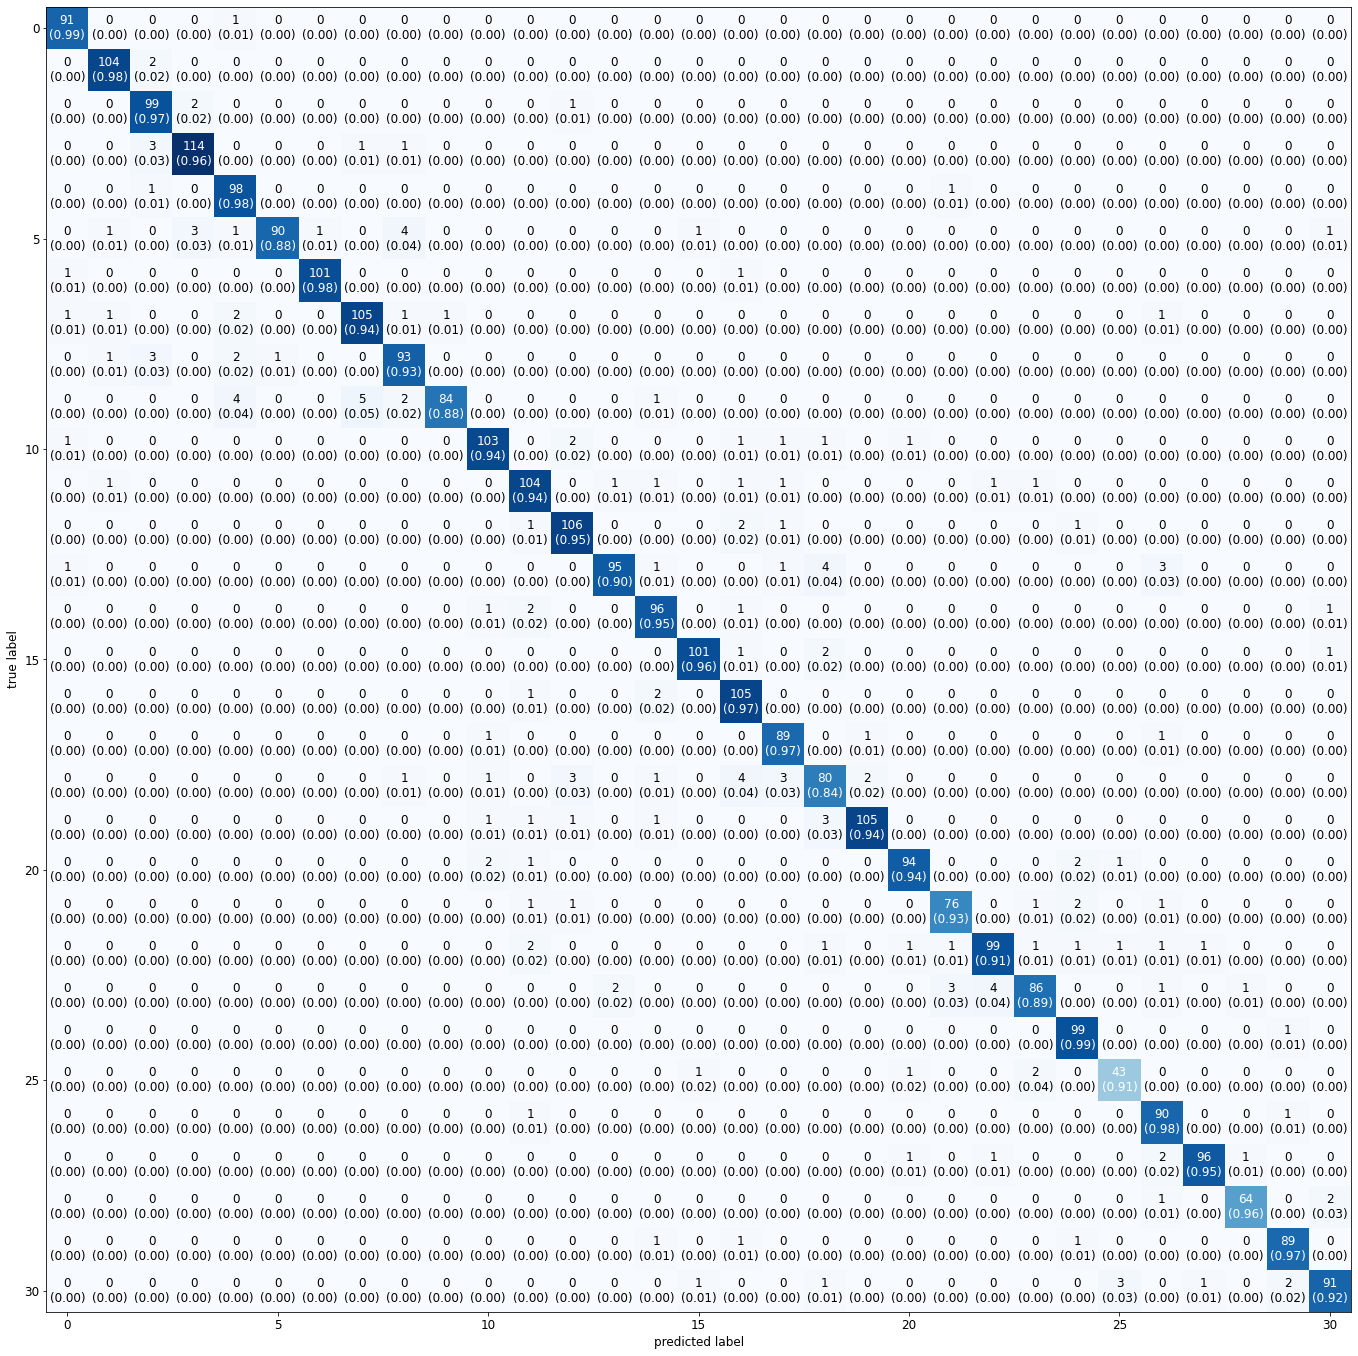

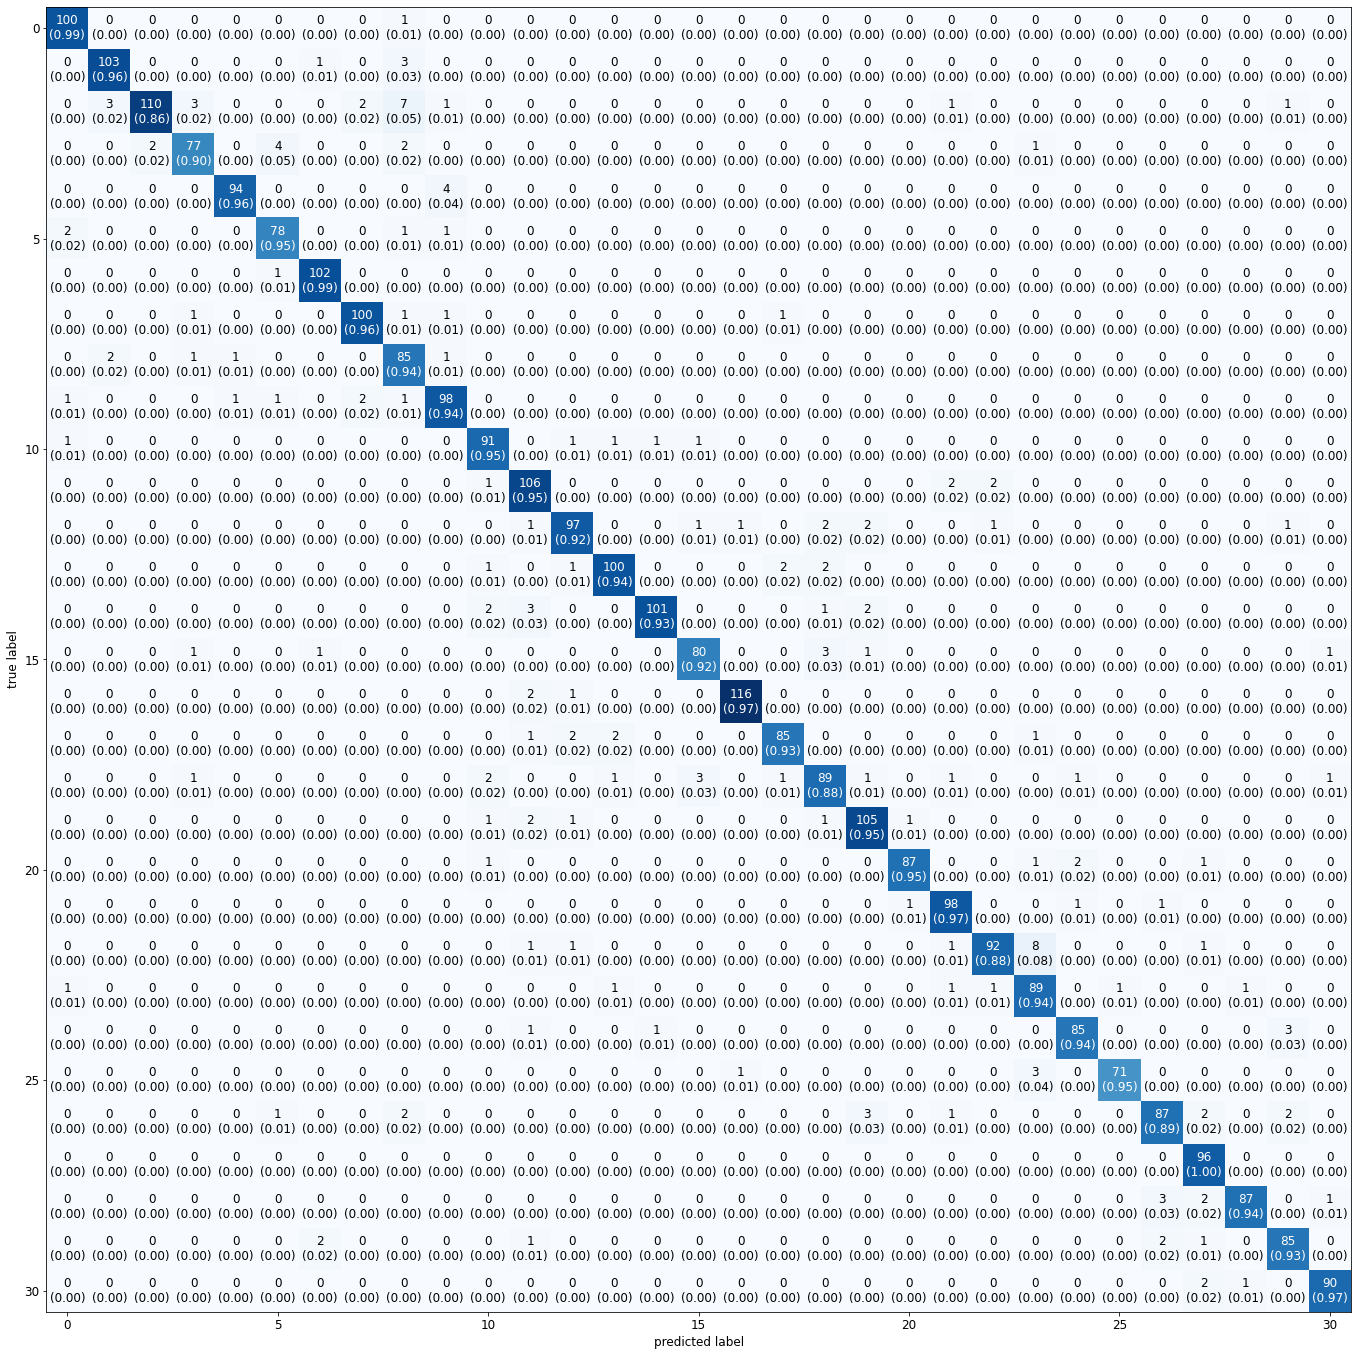

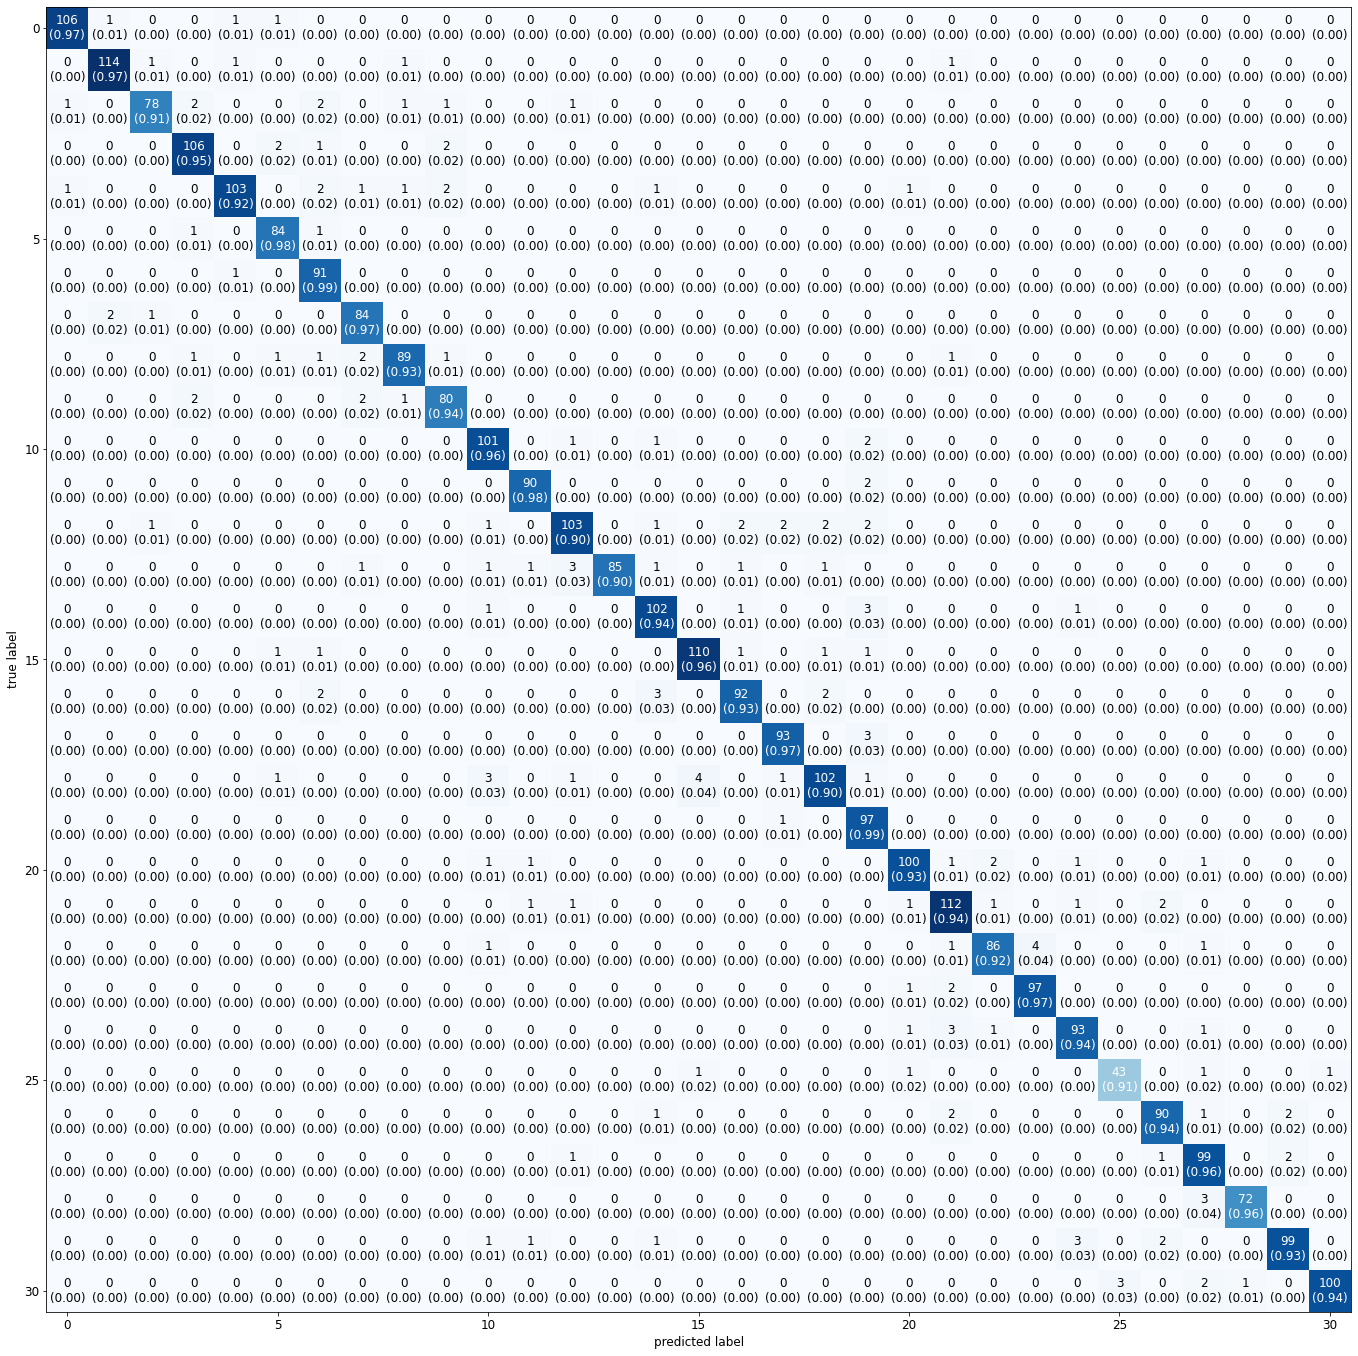

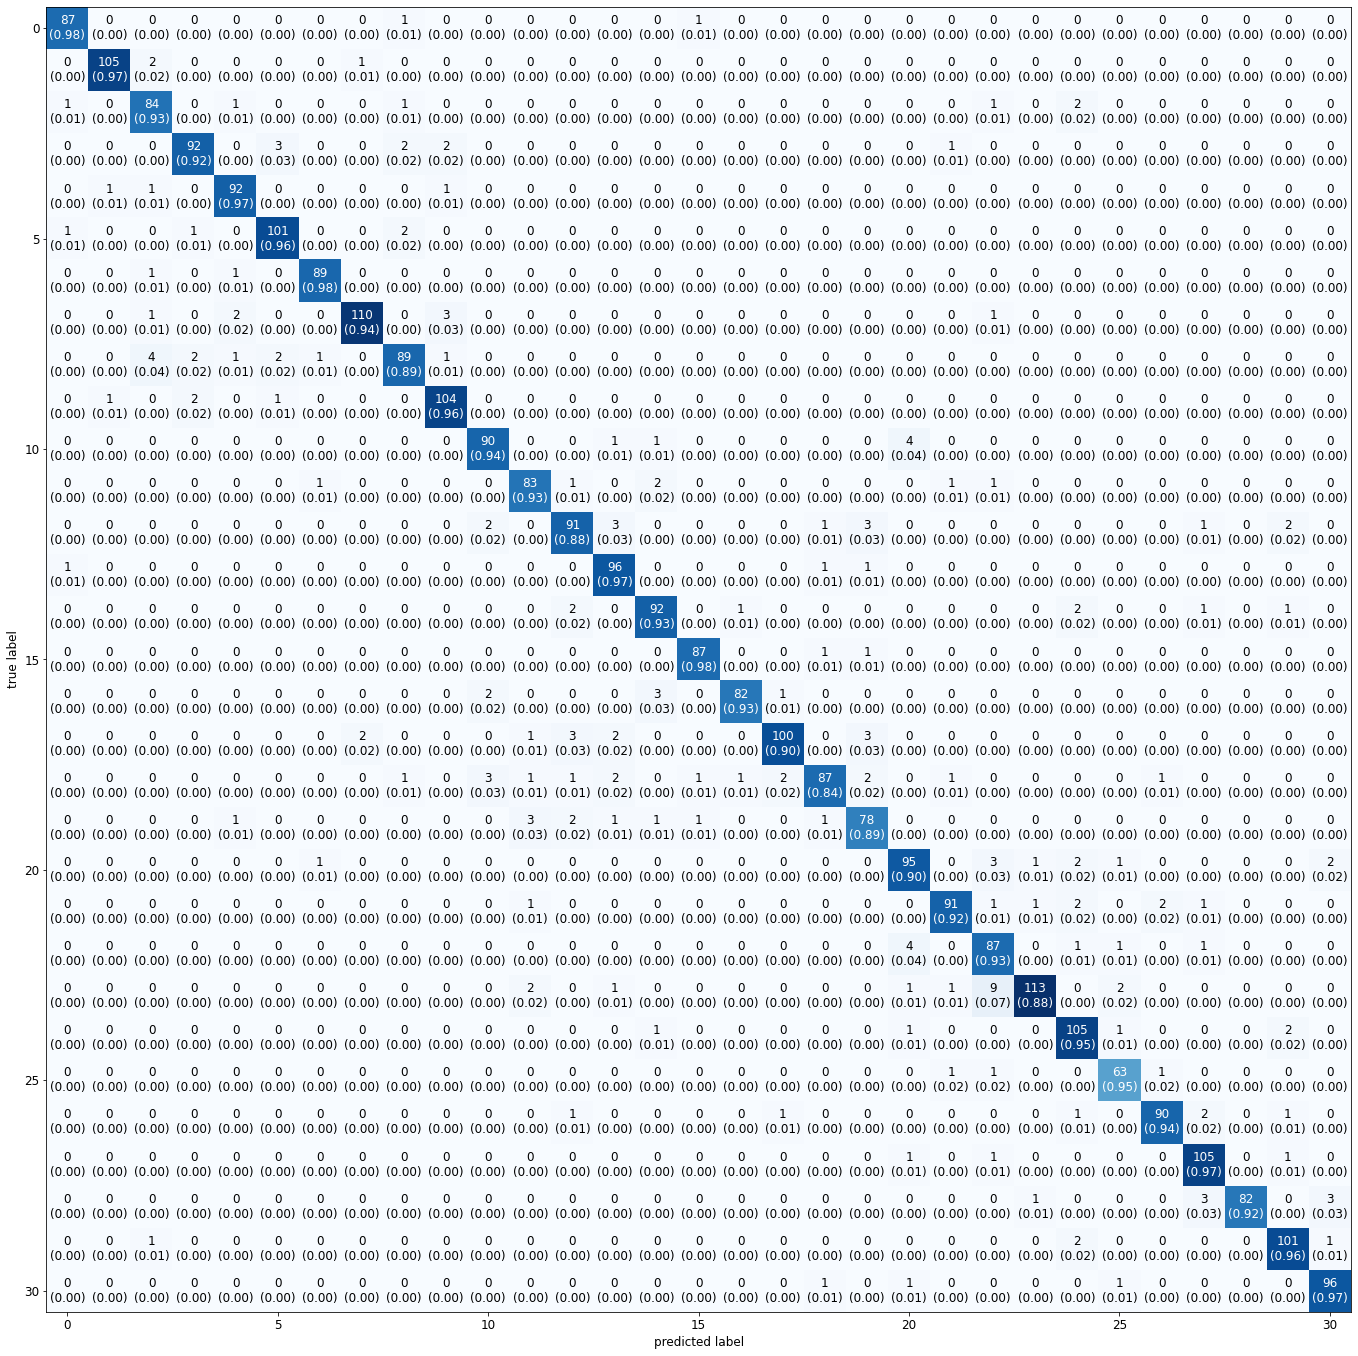

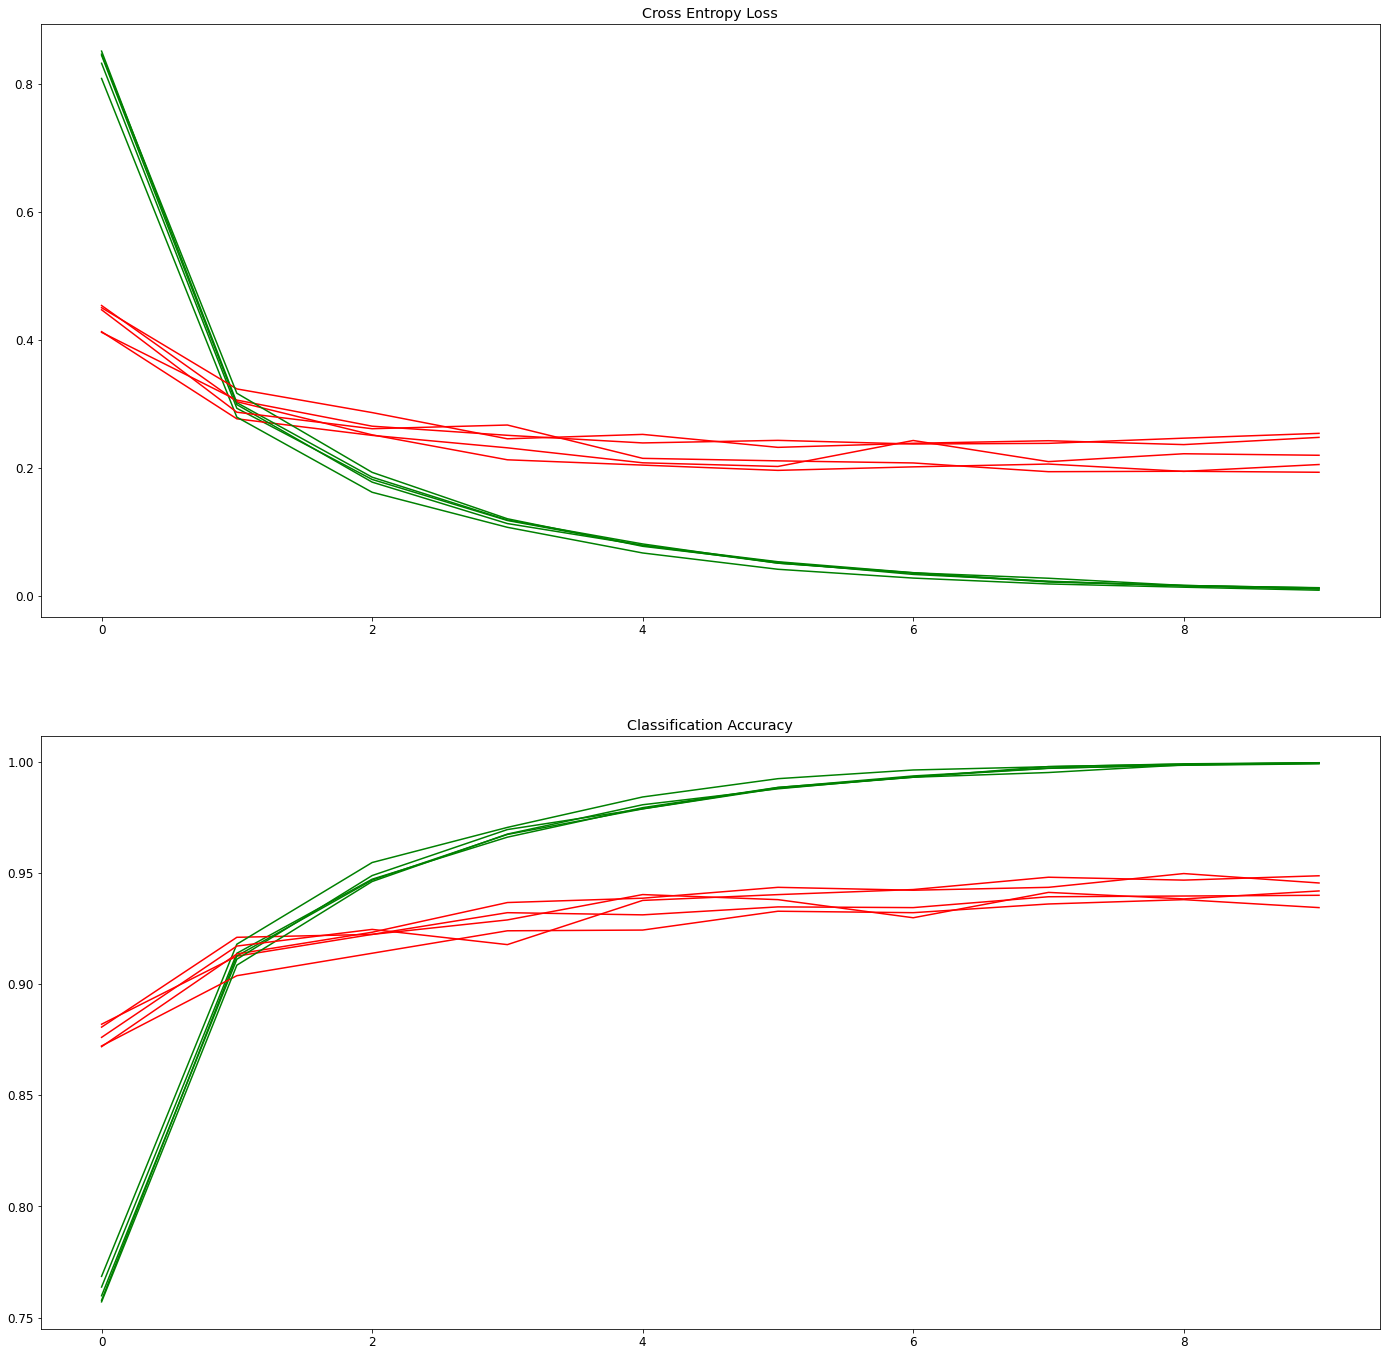

Accuracy: mean=94.217 std=0.489, n=5


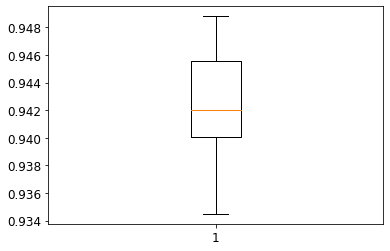

In [0]:
class_names = ['11', '12', '13', '14', '15', '16', '17', '18', '19', '20'
              ,'21', '22', '23', '24', '25', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'
              ,'10', '0', '1', '2', '3', '4', '5', '6', '7', '8','9']
# load dataset
# reshape dataset to have a single channel
data_test = data_test.reshape((data_test.shape[0], 28, 28, 1))
# prepare pixel data
trainX = prep_pixels(data_test)
# Encode labels
trainY = to_categorical(labels_test)
# Evaluate model
scores, histories = evaluate_model(trainX, trainY)
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

In [0]:
np.save('/content/drive/My Drive/MYDB/scores_baseline.npy',scores)
np.save('/content/drive/My Drive/MYDB/histories_baseline.npy',histories)

In [0]:
print(histories)

[<keras.callbacks.callbacks.History object at 0x7fe558a3b518>, <keras.callbacks.callbacks.History object at 0x7fe553a14358>, <keras.callbacks.callbacks.History object at 0x7fe5537b94a8>, <keras.callbacks.callbacks.History object at 0x7fe5534d85f8>, <keras.callbacks.callbacks.History object at 0x7fe553276ba8>]


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_test, labels_test, test_size=.2)
y_pred = model.predict_classes(x_train)


(12271, 28, 28, 1)
(3068, 28, 28, 1)


In [0]:
!pip install mlxtend

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

In [0]:
font = {
    'family': 'Times New Roman',
    'size': 12
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), class_names = class_names, show_normed=False)